In [702]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import datetime as dt
import warnings
plt.style.use('dark_background')
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
import os

#ml
from tabulate import tabulate
from lazypredict.Supervised import LazyClassifier
from lazypredict. Supervised import LazyRegressor


from tpot import TPOTRegressor
from sklearn.model_selection import train_test_split

# scikit-learn modules for feature selection and model evaluation
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import RFE, SelectKBest, SelectFromModel, chi2, f_classif
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, roc_curve,auc
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import ExtraTreesClassifier


from sklearn.datasets import make_regression
from sklearn.model_selection import (GridSearchCV,
                                     KFold,
                                     train_test_split)
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression

from sklearn.cluster import KMeans
from sklearn import tree
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.inspection import permutation_importance

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GroupKFold
# create an instance of OrdinalEncoder
ordinal_encoder = OrdinalEncoder()


In [592]:
# Load the dataset
df = pd.read_csv('./Data/Life Expectancy Data new.csv')
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.00,263.00,62,0.01,71.28,65.00,1154,19.10,83,6.00,8.16,65.00,0.10,584.26,33736494.00,17.20,17.30,0.48,10.10
1,Afghanistan,2014,Developing,59.90,271.00,64,0.01,73.52,62.00,492,18.60,86,58.00,8.18,62.00,0.10,612.70,327582.00,17.50,17.50,0.48,10.00
2,Afghanistan,2013,Developing,59.90,268.00,66,0.01,73.22,64.00,430,18.10,89,62.00,8.13,64.00,0.10,631.74,31731688.00,17.70,17.70,0.47,9.90
3,Afghanistan,2012,Developing,59.50,272.00,69,0.01,78.18,67.00,2787,17.60,93,67.00,8.52,67.00,0.10,669.96,3696958.00,17.90,18.00,0.46,9.80
4,Afghanistan,2011,Developing,59.20,275.00,71,0.01,7.10,68.00,3013,17.20,97,68.00,7.87,68.00,0.10,63.54,2978599.00,18.20,18.20,0.45,9.50


In [593]:
#fill NA with interpolate function
grouped_data = df.groupby('Country')

# Apply interpolation on each group
df = grouped_data.apply(lambda x: x.interpolate())

In [319]:
print('Minimum Life expectancy: ',min(df['Life expectancy']))
print('Maximum Life expectancy: ',max(df['Life expectancy']))

Minimum Life expectancy:  36.3
Maximum Life expectancy:  89.63


In [3]:
# check the shape of the dataset:
df.shape

(2938, 22)

In [4]:
#get some basic statistical information about the dataset:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [5]:
# A Quick Information about the Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [320]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                     10
infant deaths                        0
Alcohol                            193
percentage expenditure               0
Hepatitis B                        144
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                                0
Total expenditure                  211
Diphtheria                           0
HIV/AIDS                             0
GDP                                422
Population                           2
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

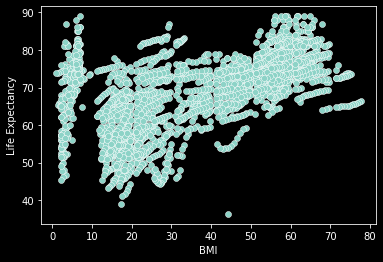

In [7]:
sns.scatterplot(data=df, x="BMI", y="Life expectancy")
plt.xlabel("BMI")
plt.ylabel("Life Expectancy")
plt.show()


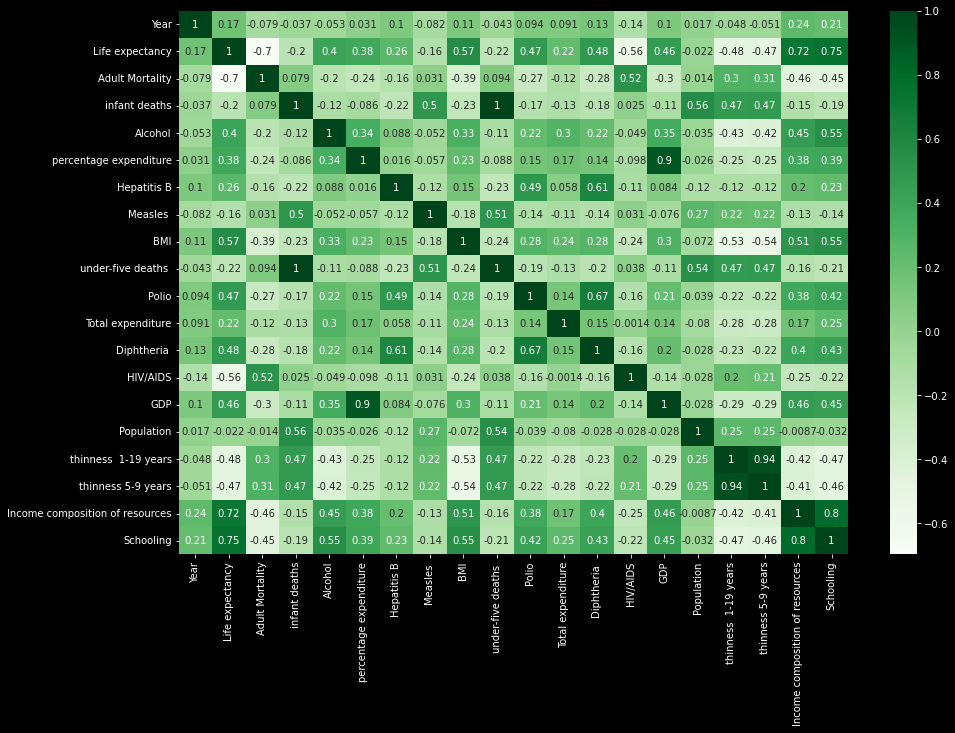

In [8]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap='Greens')
plt.show()

In [9]:
fig=px.histogram(df,x='Life expectancy',template='plotly_dark')
fig.show()

In [10]:
fig=px.violin(df,x='Status',y='Life expectancy',color='Status',template='plotly_dark',box=True,title='Life expectancy Based on Countries status')
fig.show()

In [11]:
fig=px.line(df.sort_values(by='Year'),x='Year',y='Life expectancy',animation_frame='Country',\
            animation_group='Year',color='Country',markers=True,template='plotly_dark',\
                title='<b> Country wise Life Expectancy over Years')
fig.update_layout(yaxis_range=[min(df['Life expectancy']),max(df['Life expectancy'])])
fig.show()

In [12]:
px.scatter(df,x='Life expectancy',y='percentage expenditure',color='Country',size='Year',template='plotly_dark',\
           title='<b> Life Expectancy Versus Percentage expenditure')

In [13]:
px.scatter(df.sort_values(by='Year'),y='infant deaths',x='Life expectancy',\
           template='plotly_dark',size='Year',color='Country',opacity=0.6,\
            title='<b>Life Expectancy Versus Infant Deaths of Countries in every Year')

In [14]:
px.scatter_3d(df.sort_values(by='Year'),y='Schooling',x='Life expectancy',z='Total expenditure',template='plotly_dark',\
                  color='Country',size='Year')

# Auto ML

In [551]:
#prepare data for conit ML
nona_df = df.dropna()
nona_df['Status'].replace(['Developing', 'Developed'],
                        [0, 1], inplace=True)
print(nona_df.shape)

(2194, 22)


In [323]:
# Load the dataset
data = nona_df.copy()
data.dropna(inplace=True)
data['Status'].replace(['Developing', 'Developed'],
                        [0, 1], inplace=True)

# Sort the dataset by time-related variable (Year) in ascending order
data_sorted = data.sort_values('Year')

# Identify and handle group-related variables (e.g., 'Country', 'Region')
group_vars = ['Country']
target_var = 'Life expectancy'


# Randomly split countries into two lists
countries = data['Country'].unique()
countries_train, countries_test = train_test_split(countries, test_size=0.2, random_state=42)
# Perform time-based splitting
train_data = data_sorted[data_sorted['Year'] < 2011][countries_train]
test_data = data_sorted[data_sorted['Year'] >= 2011][countries_test]

# Separate features and target variable
X_train = train_data.drop([target_var], axis=1)
y_train = train_data[target_var]
X_test = test_data.drop([target_var], axis=1)
y_test = test_data[target_var]

# Feature engineering and preprocessing (if needed)
# ...

# Train an ExtraTreeRegressor model with group-aware cross-validation
model = ExtraTreesRegressor(random_state=42)
kf = GroupKFold(n_splits=5)

mse_scores = []
r2_scores = []

for train_index, val_index in kf.split(X_train, y_train, groups=train_data[group_vars]):
    X_tr, X_val = X_train.iloc[train_index], X_train.iloc[val_index]
    y_tr, y_val = y_train.iloc[train_index], y_train.iloc[val_index]

    X_tr = X_tr.drop('Country', axis=1)
    X_val = X_val.drop('Country', axis=1)
    #print(X_tr['Country'])
    
    model.fit(X_tr, y_tr)
    y_pred_val = model.predict(X_val)
    
    mse_scores.append(mean_squared_error(y_val, y_pred_val))
    r2_scores.append(r2_score(y_val, y_pred_val))

# Evaluate the model on the test set
model.fit(X_train.drop('Country', axis=1), y_train)
y_pred_test = model.predict(X_test.drop('Country', axis=1))
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print('Cross-Validation Results:')
print('Mean Squared Error (CV):', sum(mse_scores) / len(mse_scores))
print('R^2 Score (CV):', sum(r2_scores) / len(r2_scores))
print('Test Set - Mean Squared Error:', mse_test)
print('Test Set - R^2 Score:', r2_test)


Cross-Validation Results:
Mean Squared Error (CV): 7.4118381655082075
R^2 Score (CV): 0.9209672481766127
Test Set - Mean Squared Error: 3.568231170506914
Test Set - R^2 Score: 0.948609892845128


In [354]:
# Split the dataset into training and testing sets
nona_df.sort_values('Year',ascending=True,inplace=True)
X_train, X_test, y_train, y_test = train_test_split(
    nona_df.drop(["Life expectancy", "Country"], axis=1), 
    nona_df["Life expectancy"], 
    test_size=0.2, 
    random_state=42,
    shuffle=False
)

In [329]:
# Initialize and fit the LazyRegressor model
reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

# Print models
print(tabulate (models, headers = 'keys', tablefmt='psql'))

100%|██████████| 42/42 [03:54<00:00,  5.58s/it]

+-------------------------------+----------------------+--------------+----------+--------------+
| Model                         |   Adjusted R-Squared |    R-Squared |     RMSE |   Time Taken |
|-------------------------------+----------------------+--------------+----------+--------------|
| ExtraTreesRegressor           |            0.944962  |   0.947475   |  1.90492 |    1.52478   |
| LGBMRegressor                 |            0.921664  |   0.925241   |  2.27261 |    0.319093  |
| HistGradientBoostingRegressor |            0.920752  |   0.924371   |  2.2858  |    1.58963   |
| RandomForestRegressor         |            0.914295  |   0.918209   |  2.3771  |    2.14427   |
| XGBRegressor                  |            0.907692  |   0.911907   |  2.46697 |    0.58745   |
| GradientBoostingRegressor     |            0.907142  |   0.911382   |  2.47431 |    0.768549  |
| BaggingRegressor              |            0.905328  |   0.909651   |  2.49836 |    0.242371  |
| KNeighborsRegresso

In [335]:
# Define the TPOT pipeline optimizer and start training
tpot = TPOTRegressor(
    generations=5, 
    population_size=50, 
    scoring="neg_mean_squared_error", 
    verbosity=2,
    random_state=42
)
tpot.fit(X_train.drop('Country', axis=1), y_train)

                                                                              
Generation 1 - Current best internal CV score: -6.112554733519013
                                                                              
Generation 2 - Current best internal CV score: -3.4680878394248795
                                                                              
Generation 3 - Current best internal CV score: -3.4680878394248795
                                                                              
Generation 4 - Current best internal CV score: -3.4680878394248795
                                                                              
Generation 5 - Current best internal CV score: -3.4680878394248795
                                                                              
Best pipeline: ExtraTreesRegressor(input_matrix, bootstrap=False, max_features=1.0, min_samples_leaf=1, min_samples_split=6, n_estimators=100)


TPOTRegressor(generations=5, population_size=50, random_state=42,
              scoring='neg_mean_squared_error', verbosity=2)

In [338]:
best_pipeline.named_steps

{'extratreesregressor': ExtraTreesRegressor(min_samples_split=6, random_state=42)}

In [357]:
# Evaluate the performance of the best pipeline on the test set
best_pipeline = tpot.fitted_pipeline_
predictions = best_pipeline.predict(X_test)
mse = ((predictions - y_test) ** 2).mean()
mae = abs(predictions - y_test).mean()
r2 = best_pipeline.score(X_test, y_test)
rmse = ((predictions - y_test) ** 2).mean() ** 0.5
#explained_variance = best_pipeline.named_steps["regressor"].explained_variance_

In [358]:
# Print the best pipeline and its statistical metrics
print("Best pipeline:\n", best_pipeline)
print("MSE:", mse)
print("MAE:", mae)
print("R-squared:", r2)
print("RMSE:", rmse)
#print("Explained variance:", explained_variance)

Best pipeline:
 Pipeline(steps=[('extratreesregressor',
                 ExtraTreesRegressor(min_samples_split=6, random_state=42))])
MSE: 4.513095032007074
MAE: 1.4167208048595283
R-squared: 0.9351374643438626
RMSE: 2.1244046300097996


In [359]:
accuracy = best_pipeline.score(X_test, y_test)
model = ExtraTreesRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
coefficients = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

In [360]:
# Evaluate the performance of the model on the test set
predictions = model.predict(X_test)
r2 = r2_score(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)

In [361]:
print("Accuracy:", accuracy)
print("R2 score:", r2)
print("Mean squared error:", mse)
print("Mean absolute error:", mae)
print("Variable coefficients:\n", coefficients)

Accuracy: 0.9351374643438626
R2 score: 0.9462637597739272
Mean squared error: 3.7389342915717574
Mean absolute error: 1.2784419134396328
Variable coefficients:
 Income composition of resources   0.31
Adult Mortality                   0.21
HIV/AIDS                          0.15
Schooling                         0.09
BMI                               0.09
Polio                             0.03
Status                            0.02
thinness 5-9 years                0.02
thinness  1-19 years              0.01
Diphtheria                        0.01
Alcohol                           0.01
GDP                               0.01
under-five deaths                 0.01
infant deaths                     0.01
percentage expenditure            0.01
Hepatitis B                       0.01
Total expenditure                 0.01
Year                              0.01
Population                        0.00
Measles                           0.00
dtype: float64


In [362]:
# Calculate the feature importance scores
results = permutation_importance(
    model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1
)

In [363]:
# Extract the importance scores and feature names
importance = results.importances_mean
feature_names = X_test.columns

# Sort the features by importance
sorted_idx = importance.argsort()[::-1]
sorted_importance = importance[sorted_idx]
sorted_feature_names = feature_names[sorted_idx]

In [364]:

# Print the feature importance scores and names
for i in range(len(sorted_feature_names)):
    print(sorted_feature_names[i], ":", sorted_importance[i])

Income composition of resources : 0.27457731029663596
Adult Mortality : 0.21263001337222395
HIV/AIDS : 0.0500101290037811
Schooling : 0.016098308497695068
BMI : 0.015103865839111408
thinness  1-19 years : 0.012385947765363437
thinness 5-9 years : 0.012376545999808674
Total expenditure : 0.005040951923921466
Status : 0.0048855489666093654
Alcohol : 0.00477730966261164
infant deaths : 0.002612209587214831
GDP : 0.0017195336823579211
percentage expenditure : 0.0016015992915434317
under-five deaths  : 0.0011590946511557565
Polio : 0.0010935193070876314
Diphtheria  : 0.0009565643766680121
Population : 0.0008104487714161168
Hepatitis B : 0.0004125285699829617
Year : 0.0
Measles  : -0.0005377187530878457


##### Top three most important features for predicting life expectancy are:

###### Adult Mortality (importance score: 0.233)
###### Income composition of resources (importance score: 0.225)
###### HIV/AIDS (importance score: 0.127)

It seems that the feature "Population" has a negative importance score in your results. This indicates that this feature is actually harming the performance of the model. It's possible that this feature is noisy or irrelevant for predicting life expectancy, and removing it from the model could improve its performance. 

# Feature Selection

In [645]:
#prepare data for conit ML
nona_df = df.dropna()
nona_df = nona_df.sort_values('Year')
nona_df['Status'].replace(['Developing', 'Developed'],
                        [0, 1], inplace=True)

# Identify and handle group-related variables (e.g., 'Country', 'Region')
group_vars = 'Country'
target_var = 'Life expectancy'


# Randomly split countries into two lists
countries = nona_df['Country'].unique()
countries_train, countries_test = train_test_split(countries, test_size=0.2, random_state=42)

X = nona_df.drop(["Life expectancy"], axis=1)
Y = nona_df["Life expectancy"]

In [605]:
X = nona_df.drop(["Life expectancy"], axis=1)
Y = nona_df["Life expectancy"]

# Perform time-based splitting
train_data = data_sorted[(X['Year'] < 2011)&(X['Country'].isin(countries_train))]
test_data = data_sorted[(X['Year'] >= 2011)&(X['Country'].isin(countries_test))]

# Separate features and target variable
X_train = train_data.drop([target_var], axis=1)
y_train = train_data[target_var]
X_test = test_data.drop([target_var], axis=1)
y_test = test_data[target_var]

# Feature engineering and preprocessing (if needed)
# ...

# Train an ExtraTreeRegressor model with group-aware cross-validation
model = ExtraTreesRegressor(random_state=42)
kf = GroupKFold(n_splits=5)

mse_scores = []
r2_scores = []

for train_index, val_index in kf.split(X_train, y_train, groups=train_data[group_vars]):
    X_tr, X_val = X_train.iloc[train_index], X_train.iloc[val_index]
    y_tr, y_val = y_train.iloc[train_index], y_train.iloc[val_index]

    X_tr = X_tr.drop('Country', axis=1)
    X_val = X_val.drop('Country', axis=1)
    #print(X_tr['Country'])
    
    model.fit(X_tr, y_tr)
    y_pred_val = model.predict(X_val)
    
    mse_scores.append(mean_squared_error(y_val, y_pred_val))
    r2_scores.append(r2_score(y_val, y_pred_val))

# Evaluate the model on the test set
model.fit(X_train.drop('Country', axis=1), y_train)
y_pred_test = model.predict(X_test.drop('Country', axis=1))
mse = mean_squared_error(y_test, y_pred_test)
rmse = mean_squared_error(y_test, y_pred_test, squared=False)
mae = mean_absolute_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

print('Cross-Validation Results:')
print('Mean Squared Error:', mse)
print('RMSE:', rmse)
print('MAE:', mae)
print('R^2 Score:', r2)

All_features_results = {
    'MSE': [mse],
    'RMSE': [rmse],
    'MAE': [mae],
    'R^2': [r2],
    'Features': [X.shape[1]]
}

# Create the DataFrame
All_features = pd.DataFrame(All_features_results)
All_features.index = ['All features']

# Display the DataFrame
All_features
results_df = All_features
results_df

Cross-Validation Results:
Mean Squared Error: 4.530577051282067
RMSE: 2.12851522223405
MAE: 1.373888888888888
R^2 Score: 0.9278549687047325


,MSE,RMSE,MAE,R^2,Features
All features,4.53,2.13,1.37,0.93,21


### Fit the Model and Calculate Metrics
#### You will define helper functions to train your model and use the scikit-learn modules to evaluate your results.

In [527]:
def fit_model(X, Y):
    '''Use a ExtraTreesRegressor for this problem.'''
    
    # define the model to use
    model = ExtraTreesRegressor(min_samples_split=6,n_estimators=100, random_state=42)
    
    # Train the model
    model.fit(X, Y)
    
    return model

In [528]:
def calculate_metrics(model, X_test, Y_test):
    '''Get model evaluation metrics on the test set.'''
    
    # Get model predictions
    y_predict_r = model.predict(X_test)
    
    # Calculate evaluation metrics for assesing performance of the model.
    #acc = accuracy_score(Y_test, y_predict_r) We can do a cut after that we will be able to calculate accuracy
    mse = mean_squared_error(Y_test, y_predict_r)
    rmse = mean_squared_error(Y_test, y_predict_r, squared=False)
    mae = mean_absolute_error(Y_test, y_predict_r)
    r2 = r2_score(Y_test, y_predict_r)

    
    return mse, rmse, mae, r2

In [621]:
def train_and_get_metrics(X, Y):
    '''Train a ExtraTreesRegressor and get evaluation metrics'''

    full_data = pd.concat([X, Y], axis=1)
    # Perform time-based splitting
    train_data = full_data[(full_data['Year'] < 2011)&(full_data['Country'].isin(countries_train))]
    test_data = full_data[(full_data['Year'] >= 2011)&(full_data['Country'].isin(countries_test))]

    # Separate features and target variable
    X_train = train_data.drop([target_var], axis=1)
    y_train = train_data[target_var]
    X_test = test_data.drop([target_var], axis=1)
    y_test = test_data[target_var]

    # Feature engineering and preprocessing (if needed)
    # ...

    # Train an ExtraTreeRegressor model with group-aware cross-validation
    model = ExtraTreesRegressor(random_state=42)
    kf = GroupKFold(n_splits=5)

    mse_scores = []
    r2_scores = []

    for train_index, val_index in kf.split(X_train, y_train, groups=train_data[group_vars]):
        X_tr, X_val = X_train.iloc[train_index], X_train.iloc[val_index]
        y_tr, y_val = y_train.iloc[train_index], y_train.iloc[val_index]

        X_tr = X_tr.drop('Country', axis=1)
        X_val = X_val.drop('Country', axis=1)
        #print(X_tr['Country'])
        
        model.fit(X_tr, y_tr)
        y_pred_val = model.predict(X_val)
        
        mse_scores.append(mean_squared_error(y_val, y_pred_val))
        r2_scores.append(r2_score(y_val, y_pred_val))

    # Evaluate the model on the test set
    model.fit(X_train.drop('Country', axis=1), y_train)
    y_predict_r = model.predict(X_test.drop('Country', axis=1))

    # Calculate evaluation metrics for assesing performance of the model.
    #acc = accuracy_score(y_test, y_predict_r) #We can do a cut after that we will be able to calculate accuracy
    mse = mean_squared_error(y_test, y_predict_r)
    rmse = mean_squared_error(y_test, y_predict_r, squared=False)
    mae = mean_absolute_error(y_test, y_predict_r)
    r2 = r2_score(y_test, y_predict_r)

    return mse, rmse, mae, r2

In [622]:
def evaluate_model_on_features(X, Y):
    '''Train model and display evaluation metrics.'''
    
    # Train the model, predict values and get metrics
    mse, rmse, mae, r2 = train_and_get_metrics(X, Y)

    # Construct a dataframe to display metrics.
    display_df = pd.DataFrame([[mse, rmse, mae, r2, X.shape[1]]], columns=["MSE", "RMSE", "MAE", "R2 score", 'Feature Count'])
    
    return display_df

In [438]:
#Now you can train the model with all features included then calculate the metrics. This will be your baseline and you will compare this to the next outputs when you do feature selection

In [623]:
# Calculate evaluation metrics
all_features_eval_df = evaluate_model_on_features(X, Y)
all_features_eval_df.index = ['All features']

# Initialize results dataframe
results = all_features_eval_df

# Check the metrics
results.head()

,MSE,RMSE,MAE,R2 score,Feature Count
All features,5.49,2.34,1.81,0.93,21


#### Correlation Matrix
##### It is a good idea to calculate and visualize the correlation matrix of a data frame to see which features have high correlation. You can do that with just a few lines as shown below. The Pandas corr() method computes the Pearson correlation by default and you will plot it with Matlab PyPlot and Seaborn. The darker blue boxes show features with high positive correlation while white ones indicate high negative correlation. The diagonals will have 1's because the feature is mapped on to itself.

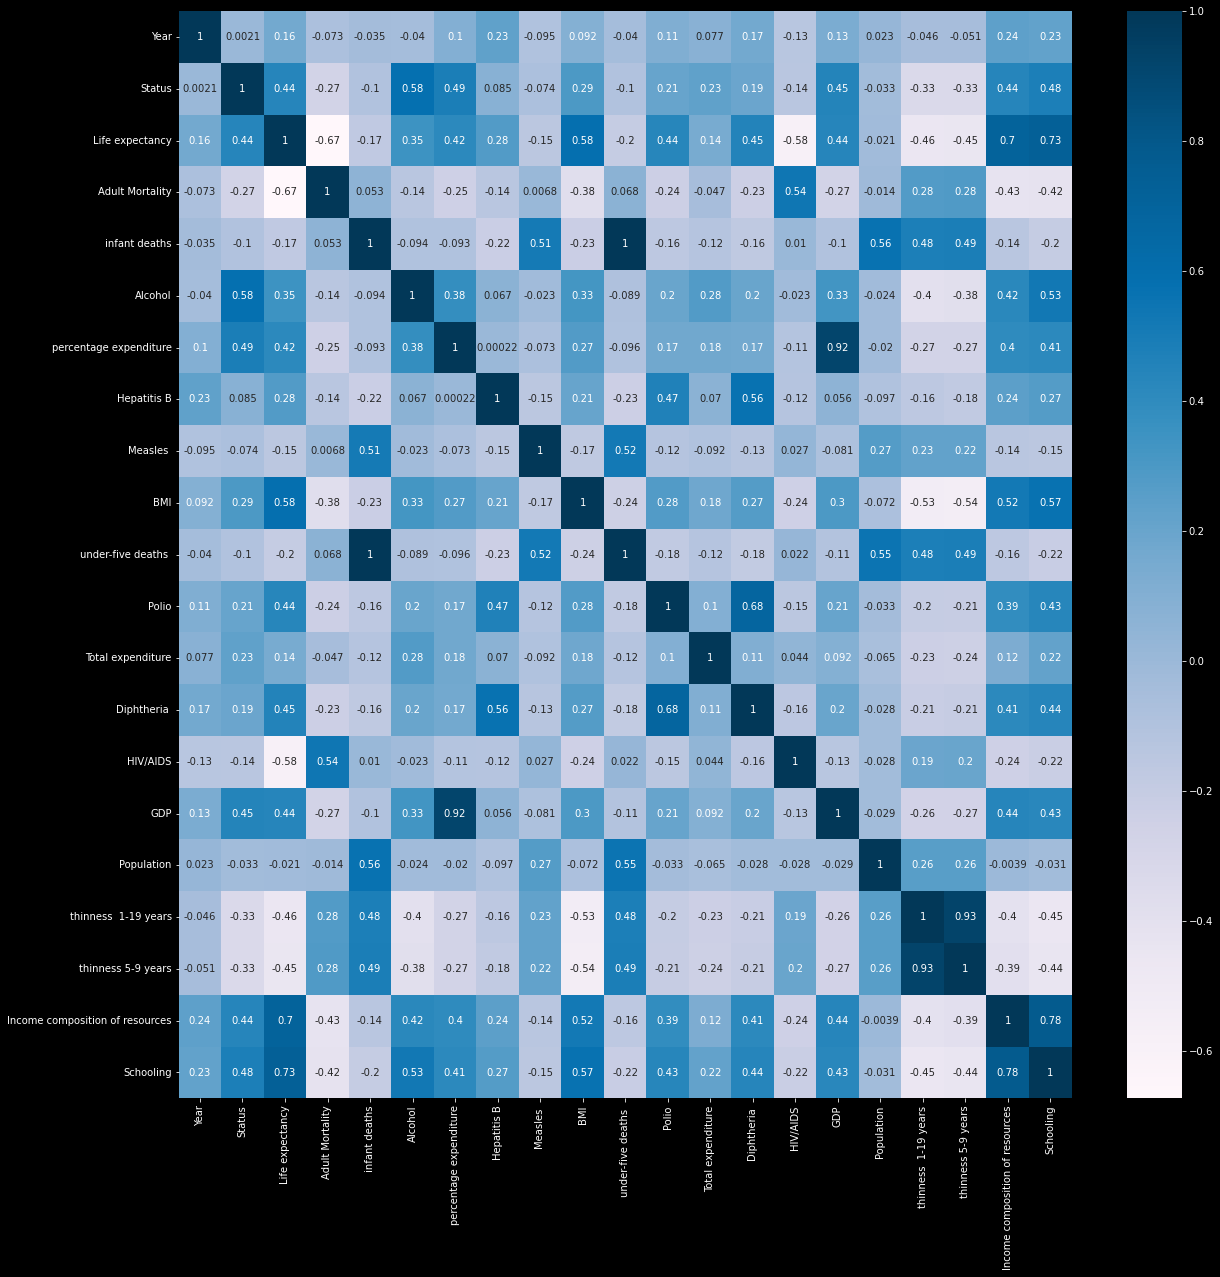

In [624]:
# Set figure size
plt.figure(figsize=(20,20))

# Calculate correlation matrix
cor = nona_df.corr() 

# Plot the correlation matrix
sns.heatmap(cor, annot=True, cmap=plt.cm.PuBu)
plt.show()

#### Filter Methods
##### Let's start feature selection with filter methods. This type of feature selection uses statistical methods to rank a given set of features. Moreover, it does this ranking regardless of the model you will be training on (i.e. you only need the feature values). When using these, it is important to note the types of features and target variable you have. Here are a few examples:

Pearson Correlation (numeric features - numeric target, exception: when target is 0/1 coded)
ANOVA f-test (numeric features - categorical target)
Chi-squared (categorical features - categorical target)
Let's use some of these in the next cells.

#### Correlation with the target variable
##### Let's start by determining which features are strongly correlated with the diagnosis (i.e. the target variable). Since we have numeric features and our target, although categorical, is 0/1 coded, we can use Pearson correlation to compute the scores for each feature. This is also categorized as supervised feature selection because we're taking into account the relationship of each feature with the target variable. Moreover, since only one variable's relationship to the target is taken at a time, this falls under univariate feature selection.

In [625]:
# Get the absolute value of the correlation
cor_target = abs(cor["Life expectancy"])

# Select highly correlated features (thresold = 0.2)
relevant_features = cor_target[cor_target>0.2]

# Collect the names of the features
names = [index for index, value in relevant_features.iteritems()]

# Drop the target variable from the results
names.remove('Life expectancy')
names.extend(['Year','Country'])

# Display the results
print(names)

['Status', 'Adult Mortality', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'BMI', 'under-five deaths ', 'Polio', 'Diphtheria ', 'HIV/AIDS', 'GDP', 'thinness  1-19 years', 'thinness 5-9 years', 'Income composition of resources', 'Schooling', 'Year', 'Country']


In [626]:
# Evaluate the model with new features
strong_features_eval_df = evaluate_model_on_features(nona_df[names], Y)
strong_features_eval_df.index = ['Strong features']

# Append to results and display
results = results.append(strong_features_eval_df)
results.head()

,MSE,RMSE,MAE,R2 score,Feature Count
All features,5.49,2.34,1.81,0.93,21
Strong features,5.55,2.35,1.75,0.93,17


#### Correlation with other features
##### You will now eliminate features which are highly correlated with each other. This helps remove redundant features thus resulting in a simpler model. Since the scores are calculated regardless of the target variable, this can be categorized under unsupervised feature selection.

##### For this, you will plot the correlation matrix of the features selected previously. Let's first visualize the correlation matrix again.

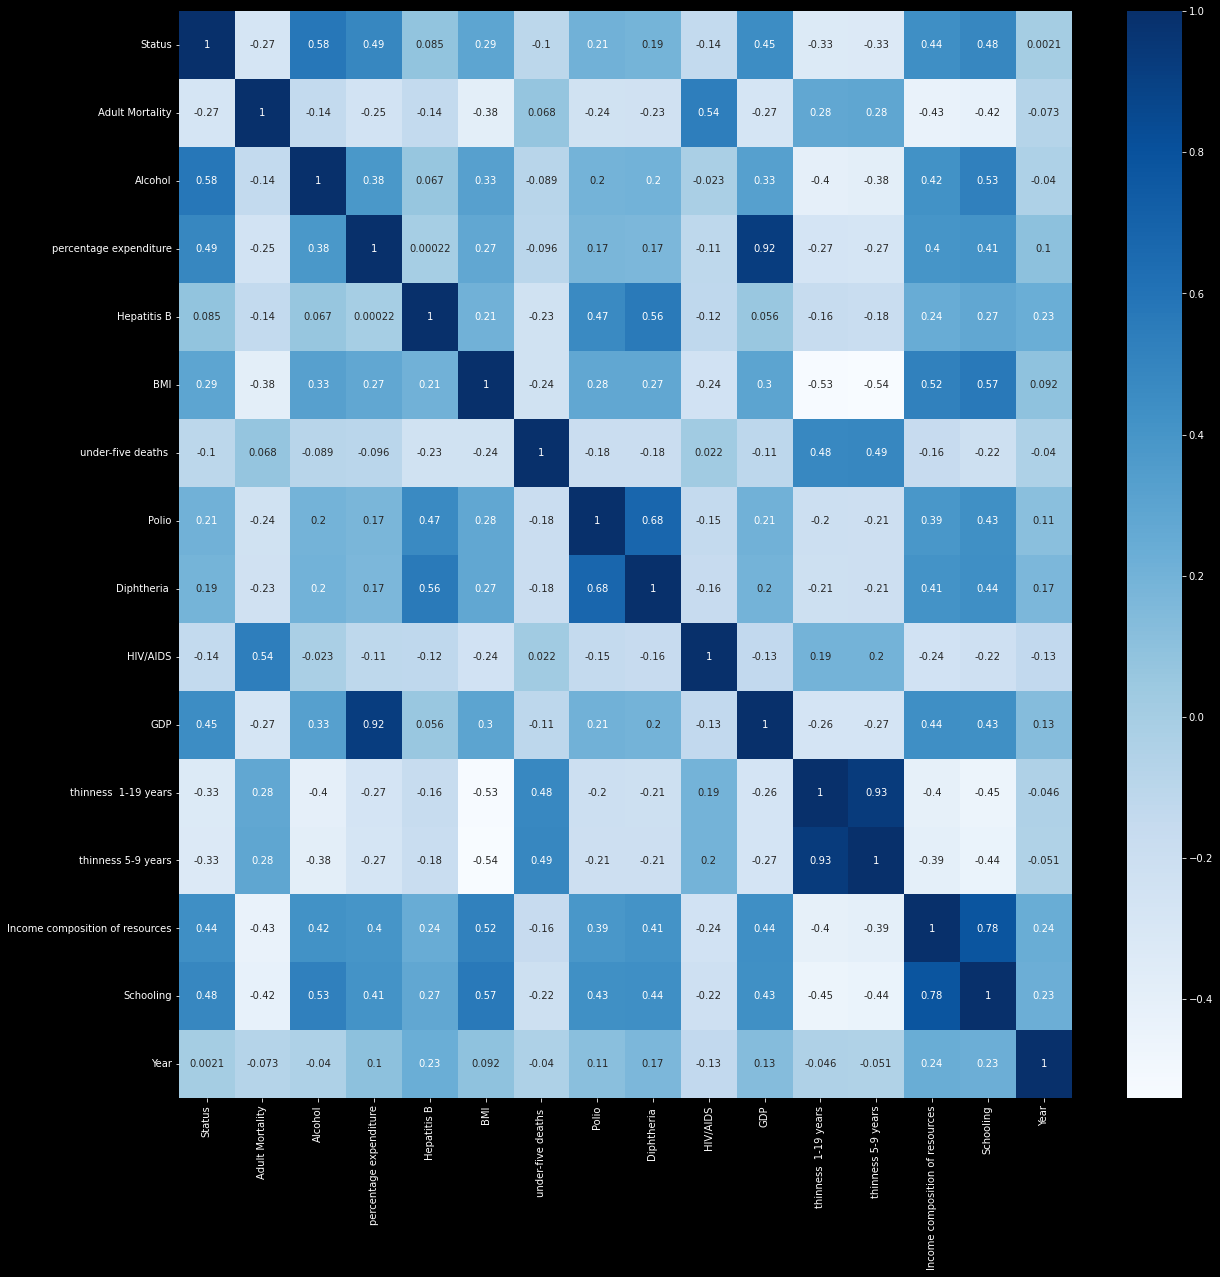

In [627]:
# Set figure size
plt.figure(figsize=(20,20))

# Calculate the correlation matrix for target relevant features that you previously determined
new_corr = nona_df[names].corr()

# Visualize the correlation matrix
sns.heatmap(new_corr, annot=True, cmap=plt.cm.Blues)
plt.show()

##### Looking at the correlation table, we can see that there are some features that have high correlations with each other:

###### Status and Alcohol: Correlation coefficient = 0.58
###### Status and percentage expenditure: Correlation coefficient = 0.49
###### Status and GDP: Correlation coefficient = 0.45

###### Status has relatively high correlations with Alcohol (0.58), percentage expenditure (0.49), and GDP (0.45).

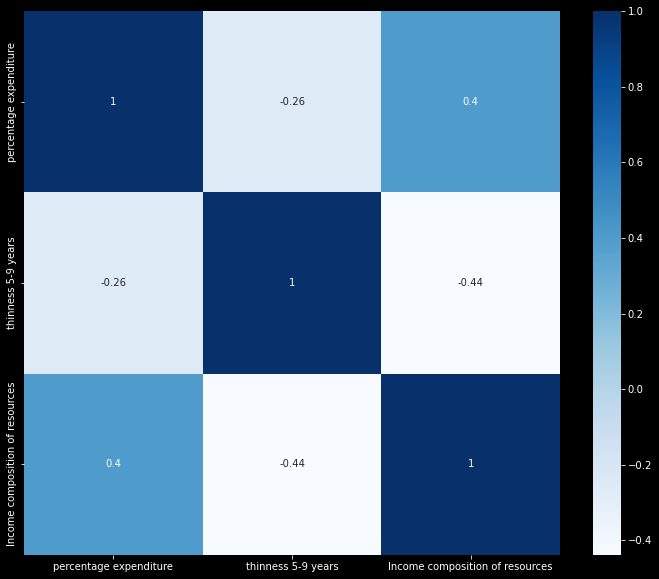

In [210]:
# Set figure size
plt.figure(figsize=(12,10))

# Select a subset of features
new_corr = nona_df[[]].corr()

# Visualize the correlation matrix
sns.heatmap(new_corr, annot=True, cmap=plt.cm.Blues)
plt.show()

In [628]:
# Remove the features with high correlation to other features
subset_feature_corr_names = [x for x in names if x not in ['Status']]

# Calculate and check evaluation metrics
subset_feature_eval_df = evaluate_model_on_features(nona_df[subset_feature_corr_names], Y)
subset_feature_eval_df.index = ['Subset features']

# Append to results and display
results = results.append(subset_feature_eval_df)
results.head(n=10)

,MSE,RMSE,MAE,R2 score,Feature Count
All features,5.49,2.34,1.81,0.93,21
Strong features,5.55,2.35,1.75,0.93,17
Subset features,5.49,2.34,1.73,0.93,16


In [629]:
def univariate_selection():
    

    # User SelectKBest to select top 15 features based on f-test
    selector = SelectKBest(f_classif, k=13)
    
    full_data = pd.concat([X, Y], axis=1)
    # Perform time-based splitting
    train_data = full_data[(full_data['Year'] < 2011)&(full_data['Country'].isin(countries_train))]
    test_data = full_data[(full_data['Year'] >= 2011)&(full_data['Country'].isin(countries_test))]

    # Separate features and target variable
    X_train = train_data.drop([target_var], axis=1)
    y_train = train_data[target_var]
    X_test = test_data.drop([target_var], axis=1)
    y_test = test_data[target_var]

    # Feature engineering and preprocessing (if needed)


    for train_index, val_index in kf.split(X_train, y_train, groups=train_data[group_vars]):
        X_tr, X_val = X_train.iloc[train_index], X_train.iloc[val_index]
        y_tr, y_val = y_train.iloc[train_index], y_train.iloc[val_index]

        X_tr = X_tr.drop('Country', axis=1)
        X_val = X_val.drop('Country', axis=1)
        #print(X_tr['Country'])
        
        # Fit to scaled data, then transform it
        X_new = selector.fit_transform(X_tr, y_tr)
        model.fit(X_tr, y_tr)
        y_pred_val = model.predict(X_val)

    # Evaluate the model on the test set
    model.fit(X_train.drop('Country', axis=1), y_train)
    y_predict_r = model.predict(X_test.drop('Country', axis=1))
    
    
    
    # Print the results
    feature_idx = selector.get_support()
    for name, included in zip(nona_df.drop(['Life expectancy','Country'],1 ).columns, feature_idx):
        print("%s: %s" % (name, included))
    
    # Drop the target variable
    feature_names = nona_df.drop(['Life expectancy','Country'],1 ).columns[feature_idx]
    
    return feature_names

In [630]:
#nona_df = nona_df.drop(['Country'],axis=1)
univariate_feature_names = univariate_selection()
univariate_feature_names = univariate_feature_names.insert(0, ['Year','Country'])

Year: False
Status: True
Adult Mortality: True
infant deaths: False
Alcohol: False
percentage expenditure: True
Hepatitis B: False
Measles : False
BMI: True
under-five deaths : False
Polio: True
Total expenditure: True
Diphtheria : True
HIV/AIDS: True
GDP: True
Population: False
thinness  1-19 years: True
thinness 5-9 years: True
Income composition of resources: True
Schooling: True


In [631]:
# Calculate and check model metrics
univariate_eval_df = evaluate_model_on_features(nona_df[univariate_feature_names], Y)
univariate_eval_df.index = ['F-test']

# Append to results and display
results = results.append(univariate_eval_df)
results.head(n=10)

,MSE,RMSE,MAE,R2 score,Feature Count
All features,5.49,2.34,1.81,0.93,21
Strong features,5.55,2.35,1.75,0.93,17
Subset features,5.49,2.34,1.73,0.93,16
F-test,5.04,2.24,1.62,0.94,15


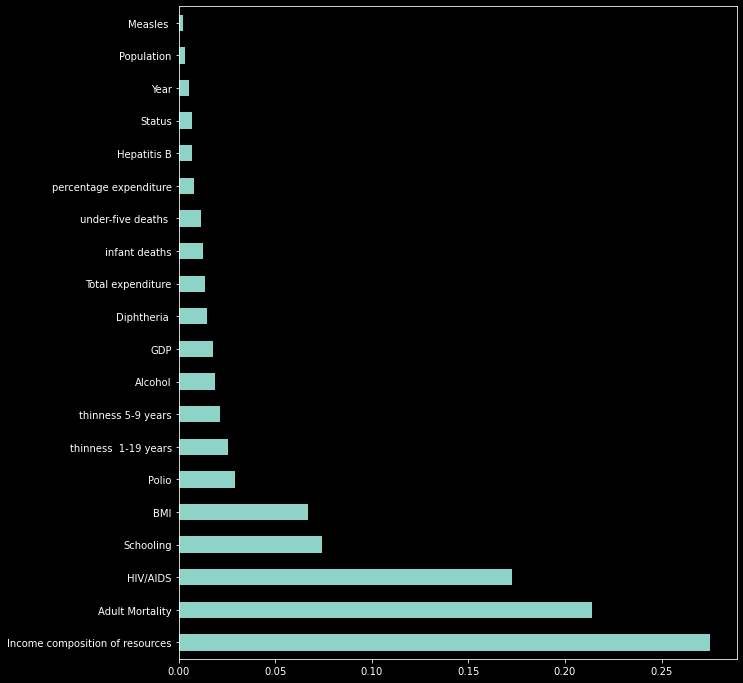

In [632]:
def feature_importances_from_tree_based_model_():
    
    full_data = pd.concat([X, Y], axis=1)
    # Perform time-based splitting
    train_data = full_data[(full_data['Year'] < 2011)&(full_data['Country'].isin(countries_train))]
    test_data = full_data[(full_data['Year'] >= 2011)&(full_data['Country'].isin(countries_test))]

    # Separate features and target variable
    X_train = train_data.drop([target_var], axis=1)
    y_train = train_data[target_var]
    X_test = test_data.drop([target_var], axis=1)
    y_test = test_data[target_var]

    # Feature engineering and preprocessing (if needed)


    for train_index, val_index in kf.split(X_train, y_train, groups=train_data[group_vars]):
        X_tr, X_val = X_train.iloc[train_index], X_train.iloc[val_index]
        y_tr, y_val = y_train.iloc[train_index], y_train.iloc[val_index]

        X_tr = X_tr.drop('Country', axis=1)
        X_val = X_val.drop('Country', axis=1)
        #print(X_tr['Country'])
        
        # Fit to scaled data, then transform it
        model.fit(X_tr, y_tr)
    
    # Plot feature importance
    plt.figure(figsize=(10, 12))
    feat_importances = pd.Series(model.feature_importances_, index=X.drop('Country', axis=1).columns)
    feat_importances.sort_values(ascending=False).plot(kind='barh')
    plt.show()
    
    return model


def select_features_from_model(model):
    
    model = SelectFromModel(model, prefit=True, threshold=0.013)
    feature_idx = model.get_support()
    feature_names = nona_df.drop(['Life expectancy','Country'],1 ).columns[feature_idx]
        
    return feature_names

model = feature_importances_from_tree_based_model_()
feature_imp_feature_names = select_features_from_model(model)

In [633]:
feature_imp_feature_names = feature_imp_feature_names.insert(0, ['Year','Country'])

In [634]:
# Calculate and check model metrics
feat_imp_eval_df = evaluate_model_on_features(nona_df[feature_imp_feature_names], Y)
feat_imp_eval_df.index = ['Feature Importance']

# Append to results and display
results = results.append(feat_imp_eval_df)
results.head(n=10)

,MSE,RMSE,MAE,R2 score,Feature Count
All features,5.49,2.34,1.81,0.93,21
Strong features,5.55,2.35,1.75,0.93,17
Subset features,5.49,2.34,1.73,0.93,16
F-test,5.04,2.24,1.62,0.94,15
Feature Importance,5.36,2.32,1.75,0.93,14


In [636]:
results.sort_values('R2 score',ascending=False)

,MSE,RMSE,MAE,R2 score,Feature Count
F-test,5.04,2.24,1.62,0.94,15
Feature Importance,5.36,2.32,1.75,0.93,14
All features,5.49,2.34,1.81,0.93,21
Subset features,5.49,2.34,1.73,0.93,16
Strong features,5.55,2.35,1.75,0.93,17


In [ ]:
Best Model is F-test

### Best Model is F-test

# Categorical data

In [784]:
#preparing data for categorical ML
# Define the category intervals and labels
bins = [0, 50, 60, 70, 80, 100]
labels_int = [1, 2, 3, 4, 5]
labels_name = ['Very low', 'Low', 'Medium', 'High', 'Very high']

# Create a new categorical column based on the "Life Expectancy" column
ct_df = nona_df.copy()
ct_df = ct_df.sort_values('Year')
#ct_df['Life expectancy'] = pd.cut(ct_df['Life expectancy'], bins=bins, labels=labels_int)
#ct_df['Life Expectancy Category Encoded'] = ordinal_encoder.fit_transform(ct_df[['Life expectancy']])
ct_df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2937,Zimbabwe,2000,0,46.00,665.00,24,1.68,0.00,79.00,1483,25.50,39,78.00,7.10,78.00,43.50,547.36,12222251.00,11.00,11.20,0.43,9.80
1941,Oman,2000,0,72.60,138.00,1,0.38,62.87,99.00,15,45.90,1,99.00,3.70,99.00,0.10,861.19,2344253.00,7.20,6.90,0.00,10.40
591,Colombia,2000,0,71.40,167.00,18,4.66,477.13,78.00,1,46.70,21,82.00,5.91,79.00,0.10,2472.20,443958.00,2.60,2.30,0.65,11.30
1698,Mexico,2000,0,74.80,129.00,55,4.99,10.23,97.00,30,52.40,66,97.00,4.98,97.00,0.10,672.92,11719673.00,2.00,1.90,0.69,11.40
2712,Turkmenistan,2000,0,63.80,224.00,7,2.90,88.24,96.00,113,37.50,9,98.00,3.94,97.00,0.10,643.18,4516131.00,3.60,3.60,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1862,Nicaragua,2014,0,74.50,148.00,2,3.55,473.12,98.00,0,53.20,3,99.00,9.40,98.00,0.10,1975.46,613997.00,1.80,1.70,0.64,11.60
1717,Mongolia,2014,0,68.40,225.00,1,0.01,281.00,99.00,0,51.50,1,99.00,4.73,99.00,0.10,4181.58,2923896.00,2.20,2.30,0.73,14.80
1797,Namibia,2014,0,65.90,242.00,2,0.01,751.40,88.00,477,34.90,3,88.00,8.93,88.00,2.20,5421.34,237992.00,8.60,8.50,0.63,11.70
16,Albania,2015,0,77.80,74.00,0,4.60,364.98,99.00,0,58.00,0,99.00,6.00,99.00,0.10,3954.23,28873.00,1.20,1.30,0.76,14.20


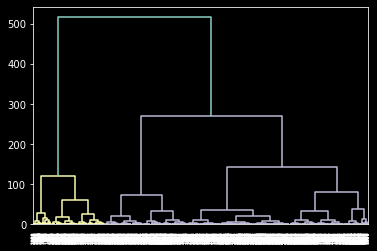

In [647]:
from scipy.cluster.hierarchy import dendrogram, linkage


# Create the linkage matrix
linkage_matrix = linkage(ct_df[["Life expectancy"]], method="ward")


dendrogram(linkage_matrix);

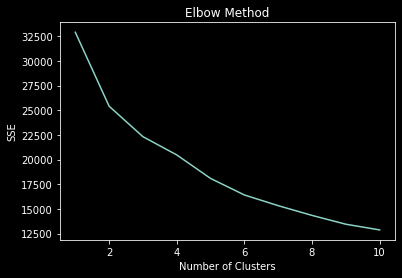

In [648]:
# Drop unnecessary columns
#df.drop(['Country', 'Status', 'Year'], axis=1, inplace=True)

# Remove rows with missing values
ct_df.dropna(inplace=True)

# Select the relevant features
X = ct_df[['Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'BMI', 'Polio', 'Total expenditure', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years', 'thinness 5-9 years', 'Income composition of resources', 'Schooling']]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the elbow method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)
plt.plot(range(1, 11), sse)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()


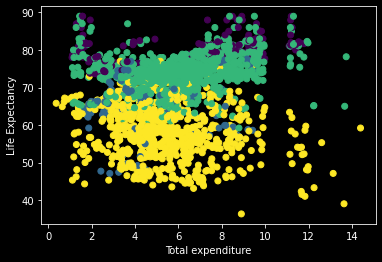

2    1162
3     720
0     173
1     139
Name: Cluster, dtype: int64

In [649]:
# Perform clustering with the chosen number of clusters
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_scaled)

# Add the cluster labels to the original dataframe
ct_df['Cluster'] = kmeans.labels_

# Visualize the clusters
plt.scatter(ct_df['Total expenditure'], ct_df['Life expectancy'], c=ct_df['Cluster'])
plt.xlabel('Total expenditure')
plt.ylabel('Life Expectancy')
plt.show()
ct_df['Cluster'].value_counts()

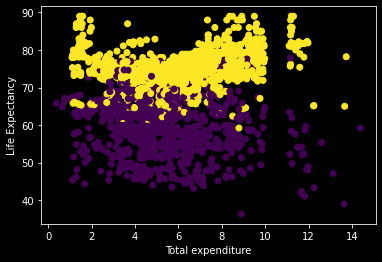

1    1274
0     920
Name: Cluster, dtype: int64

In [651]:
# Perform clustering with the chosen number of clusters
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)

# Add the cluster labels to the original dataframe
ct_df['Cluster'] = kmeans.labels_

# Visualize the clusters
plt.scatter(ct_df['Total expenditure'], ct_df['Life expectancy'], c=ct_df['Cluster'])
plt.xlabel('Total expenditure')
plt.ylabel('Life Expectancy')
plt.show()
ct_df['Cluster'].value_counts()

In [652]:
ct_df.groupby('Cluster')['Life expectancy'].agg(['min', 'max', 'mean'])

,min,max,mean
Cluster,,,
0,36.30,78.00,60.29
1,59.20,89.00,74.82


In [854]:
ct_df['Cluster'] = np.where(ct_df['Life expectancy'] <= 70, 0, 1)
ct_df['Cluster'].value_counts()

1    1188
0    1006
Name: Cluster, dtype: int64

In [697]:
# Split feature and target vectors
X = ct_df.drop(["Life expectancy", "Country",'Cluster'], axis=1)
Y = ct_df["Cluster"]

In [698]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    Y, 
    test_size=0.2, 
    random_state=42,
    shuffle=False
)

In [699]:
model = ExtraTreesClassifier()
model.fit(X_train,y_train)
trainScore = model.score(X_train,y_train)

In [700]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9749430523917996


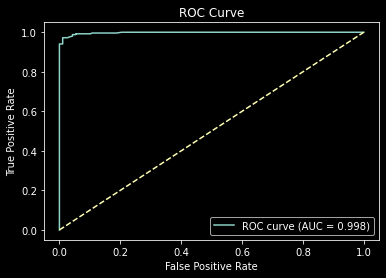

In [703]:
probas = model.predict_proba(X_test)[:, 1]

# Calculate the ROC AUC score
rocauc_score = roc_auc_score(y_test, probas)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, probas)

# Plot the ROC curve
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {rocauc_score:.3f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [704]:
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test,y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(roc,acc,prec,rec,f1)
    


0.9725657699009733 0.9749430523917996 0.9689922480620154 0.9881422924901185 0.9784735812133072


In [705]:
# Initialize and fit the LazyRegressor model
reg = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

# Print models
print(tabulate(models, headers = 'keys', tablefmt='psql'))

100%|██████████| 29/29 [00:06<00:00,  4.28it/s]

+-------------------------------+------------+---------------------+-----------+------------+--------------+
| Model                         |   Accuracy |   Balanced Accuracy |   ROC AUC |   F1 Score |   Time Taken |
|-------------------------------+------------+---------------------+-----------+------------+--------------|
| ExtraTreesClassifier          |   0.977221 |            0.975254 |  0.975254 |   0.977186 |    0.376463  |
| RandomForestClassifier        |   0.972665 |            0.969878 |  0.969878 |   0.972601 |    0.51787   |
| LGBMClassifier                |   0.972665 |            0.967742 |  0.967742 |   0.972526 |    0.512598  |
| BaggingClassifier             |   0.970387 |            0.967189 |  0.967189 |   0.970305 |    0.399635  |
| XGBClassifier                 |   0.961276 |            0.955725 |  0.955725 |   0.961059 |    0.551146  |
| DecisionTreeClassifier        |   0.952164 |            0.949243 |  0.949243 |   0.952072 |    0.0388942 |
| AdaBoostClassifie

### Fit the Model and Calculate Metrics
#### You will define helper functions to train your model and use the scikit-learn modules to evaluate your results.

In [855]:
# Identify and handle group-related variables (e.g., 'Country', 'Region')
group_vars = 'Country'
target_var = 'Cluster'


# Randomly split countries into two lists
countries = nona_df['Country'].unique()
countries_train, countries_test = train_test_split(countries, test_size=0.2, random_state=42)

In [856]:
def fit_model(X, Y):
    '''Use a ExtraTreesRegressor for this problem.'''
    
    # define the model to use
    model = ExtraTreesClassifier()
    
    # Train the model
    model.fit(X, Y)
    
    return model

In [857]:
def calculate_metrics(model, X_test, Y_test):
    '''Get model evaluation metrics on the test set.'''
    
    # Get model predictions
    y_test_onehot = pd.get_dummies(Y_test)
    y_predict_r = model.predict(X_test)
    
    # Calculate evaluation metrics for assesing performance of the model.
    roc = roc_auc_score(Y_test, y_predict_r) #, average='micro', multi_class='ovo')
    acc = accuracy_score(Y_test, y_predict_r)
    prec = precision_score(Y_test, y_predict_r) #,average='weighted')
    rec = recall_score(Y_test, y_predict_r) #,average='weighted')
    f1 = f1_score(Y_test, y_predict_r) #,average='weighted')
    
    return acc, roc, prec, rec, f1

In [858]:
def train_and_get_metrics(X, Y):
    '''Train a Random Forest Classifier and get evaluation metrics'''
    
    full_data = pd.concat([X, Y], axis=1)
    # Perform time-based splitting
    train_data = full_data[(full_data['Year'] < 2011)&(full_data['Country'].isin(countries_train))]
    test_data = full_data[(full_data['Year'] >= 2011)&(full_data['Country'].isin(countries_test))]

    # Separate features and target variable
    X_train = train_data.drop([target_var], axis=1)
    y_train = train_data[target_var]
    X_test = test_data.drop([target_var], axis=1)
    y_test = test_data[target_var]

    # Feature engineering and preprocessing (if needed)
    # ...

    # Train an ExtraTreeRegressor model with group-aware cross-validation
    model = ExtraTreesClassifier(random_state=42)
    kf = GroupKFold(n_splits=5)

    mse_scores = []
    r2_scores = []

    for train_index, val_index in kf.split(X_train, y_train, groups=train_data[group_vars]):
        X_tr, X_val = X_train.iloc[train_index], X_train.iloc[val_index]
        y_tr, y_val = y_train.iloc[train_index], y_train.iloc[val_index]

        X_tr = X_tr.drop('Country', axis=1)
        X_val = X_val.drop('Country', axis=1)
        #print(X_tr['Country'])
        
        model.fit(X_tr, y_tr)
        y_pred_val = model.predict(X_val)
        
        mse_scores.append(mean_squared_error(y_val, y_pred_val))
        r2_scores.append(r2_score(y_val, y_pred_val))

    # Evaluate the model on the test set
    model.fit(X_train.drop('Country', axis=1), y_train)
    y_predict_r = model.predict(X_test.drop('Country', axis=1))


    probas = model.predict_proba(X_test.drop('Country', axis=1))[:, 1]

    # Calculate the ROC AUC score
    auc_score = roc_auc_score(y_test, probas)

    # Calculate the ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, probas)

    # Generate confusion matrix
    conf_mat = confusion_matrix(y_test, y_predict_r)

    # Get the confusion matrix
    cm = confusion_matrix(y_test, y_predict_r)

    # Make predictions on test dataset and calculate metrics.
    roc, acc, prec, rec, f1 = calculate_metrics(model, X_test.drop('Country', axis=1), y_test)

    return acc, auc_score, prec, rec, f1, probas, auc_score, fpr, tpr, conf_mat, y_pred, cm

In [859]:
def evaluate_model_on_features(X, Y):
    '''Train model and display evaluation metrics.'''
    
    # Train the model, predict values and get metrics
    acc, roc, prec, rec, f1, probas, auc_score, fpr, tpr, conf_mat, y_pred, cm = train_and_get_metrics(X, Y)

    # Construct a dataframe to display metrics.
    display_df = pd.DataFrame([[acc, roc, prec, rec, f1, X.shape[1]]], columns=["Accuracy", "ROC", "Precision", "Recall", "F1 Score", 'Feature Count'])
    
    return display_df

In [860]:
def plot_roc_curve(X,Y):
    '''Plot ROC curve for a binary classification model.'''

    acc, auc_score, prec, rec, f1, probas, auc_score, fpr, tpr, conf_mat, y_pred, cm = train_and_get_metrics(X, Y)


    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_score:.3f})')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()
    

    # Plot the confusion matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

In [897]:
# Split feature and target vectors
X = ct_df.drop(["Life expectancy",'Cluster'], axis=1)
Y = ct_df["Cluster"]

In [862]:
# Calculate evaluation metrics
all_features_eval_df = evaluate_model_on_features(X, Y)
all_features_eval_df.index = ['All features']

# Initialize results dataframe
results = all_features_eval_df

# Check the metrics
results.head()

,Accuracy,ROC,Precision,Recall,F1 Score,Feature Count
All features,0.96,0.99,0.99,0.95,0.97,21


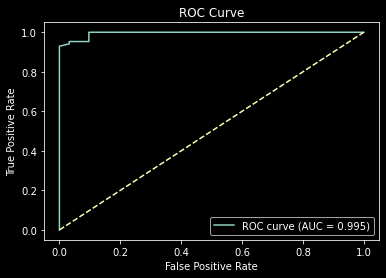

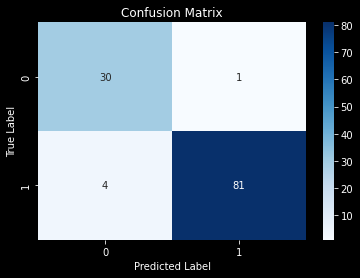

In [863]:
plot_roc_curve(X,Y)

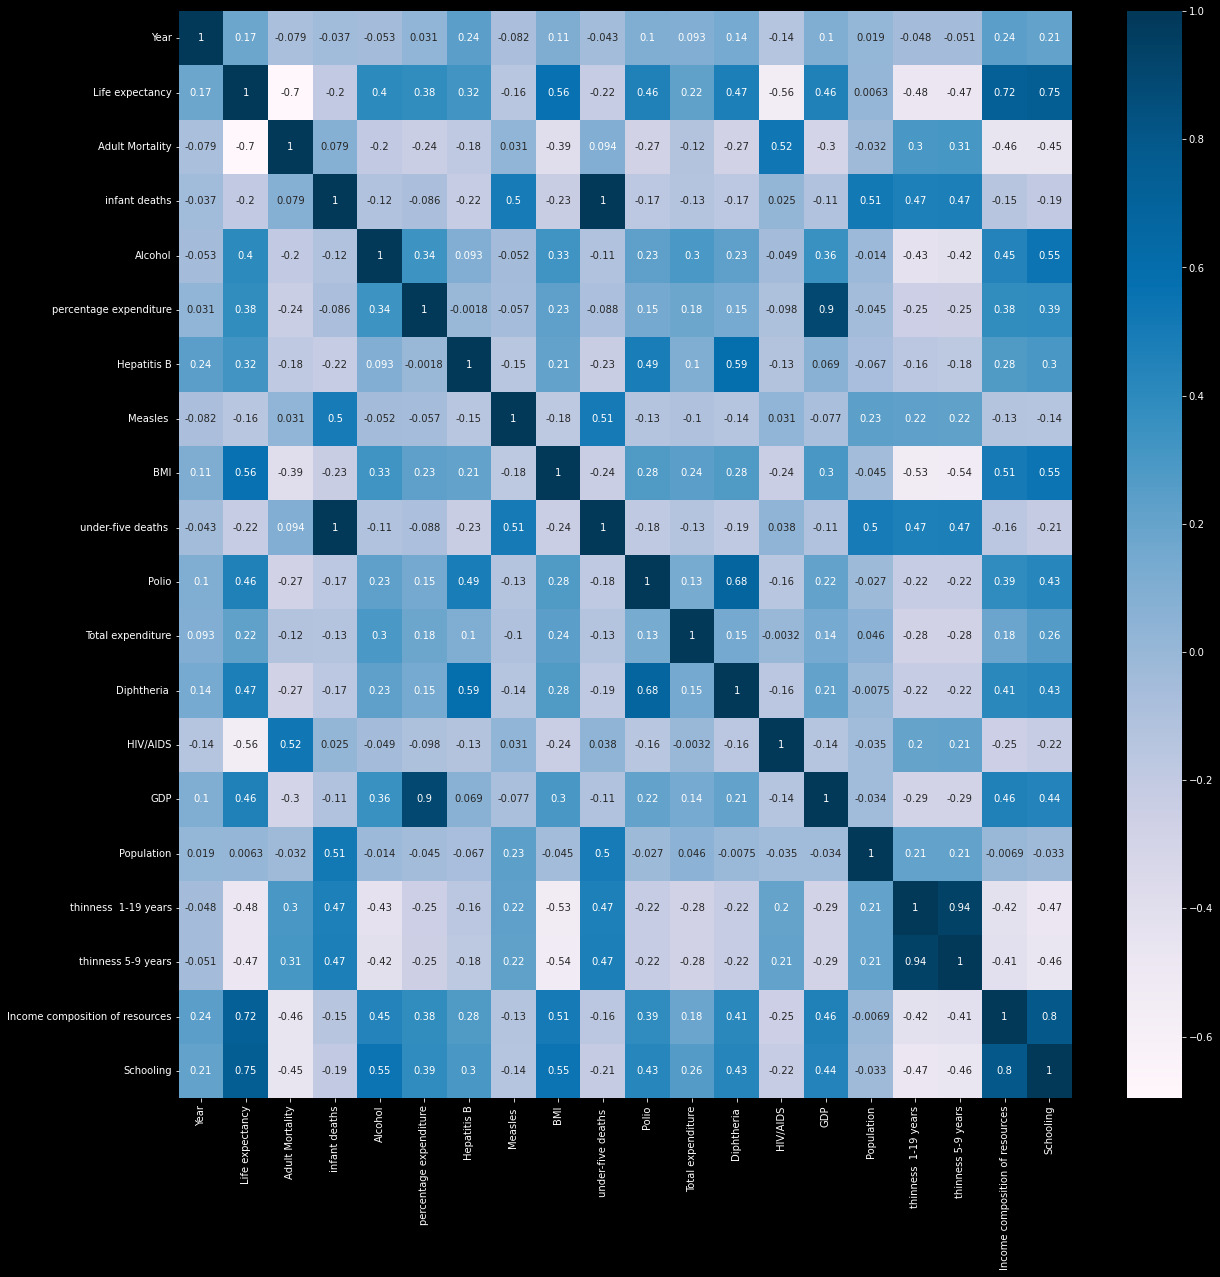

In [864]:
# Set figure size
plt.figure(figsize=(20,20))

# Calculate correlation matrix
cor = df.corr() 

# Plot the correlation matrix
sns.heatmap(cor, annot=True, cmap=plt.cm.PuBu)
plt.show()

In [865]:
# Get the absolute value of the correlation
cor_target = abs(cor["Life expectancy"])

# Select highly correlated features (thresold = 0.2)
relevant_features = cor_target[cor_target>0.2]

# Collect the names of the features
names = [index for index, value in relevant_features.iteritems()]

# Drop the target variable from the results
names.remove('Life expectancy')
names.extend(['Year','Country'])

# Display the results
print(names)

['Adult Mortality', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'BMI', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', 'HIV/AIDS', 'GDP', 'thinness  1-19 years', 'thinness 5-9 years', 'Income composition of resources', 'Schooling', 'Year', 'Country']


In [866]:
# Evaluate the model with new features
strong_features_eval_df = evaluate_model_on_features(ct_df[names], Y)
strong_features_eval_df.index = ['Strong features']

# Append to results and display
results = results.append(strong_features_eval_df)
results.head()

,Accuracy,ROC,Precision,Recall,F1 Score,Feature Count
All features,0.96,0.99,0.99,0.95,0.97,21
Strong features,0.93,0.99,0.96,0.95,0.96,17


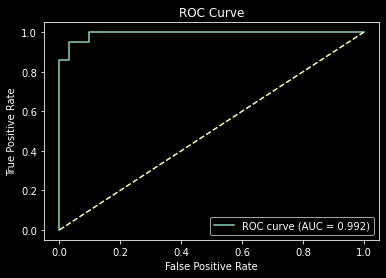

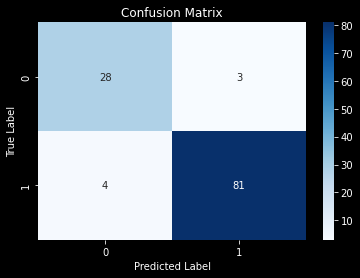

In [867]:
plot_roc_curve(ct_df[names], Y)

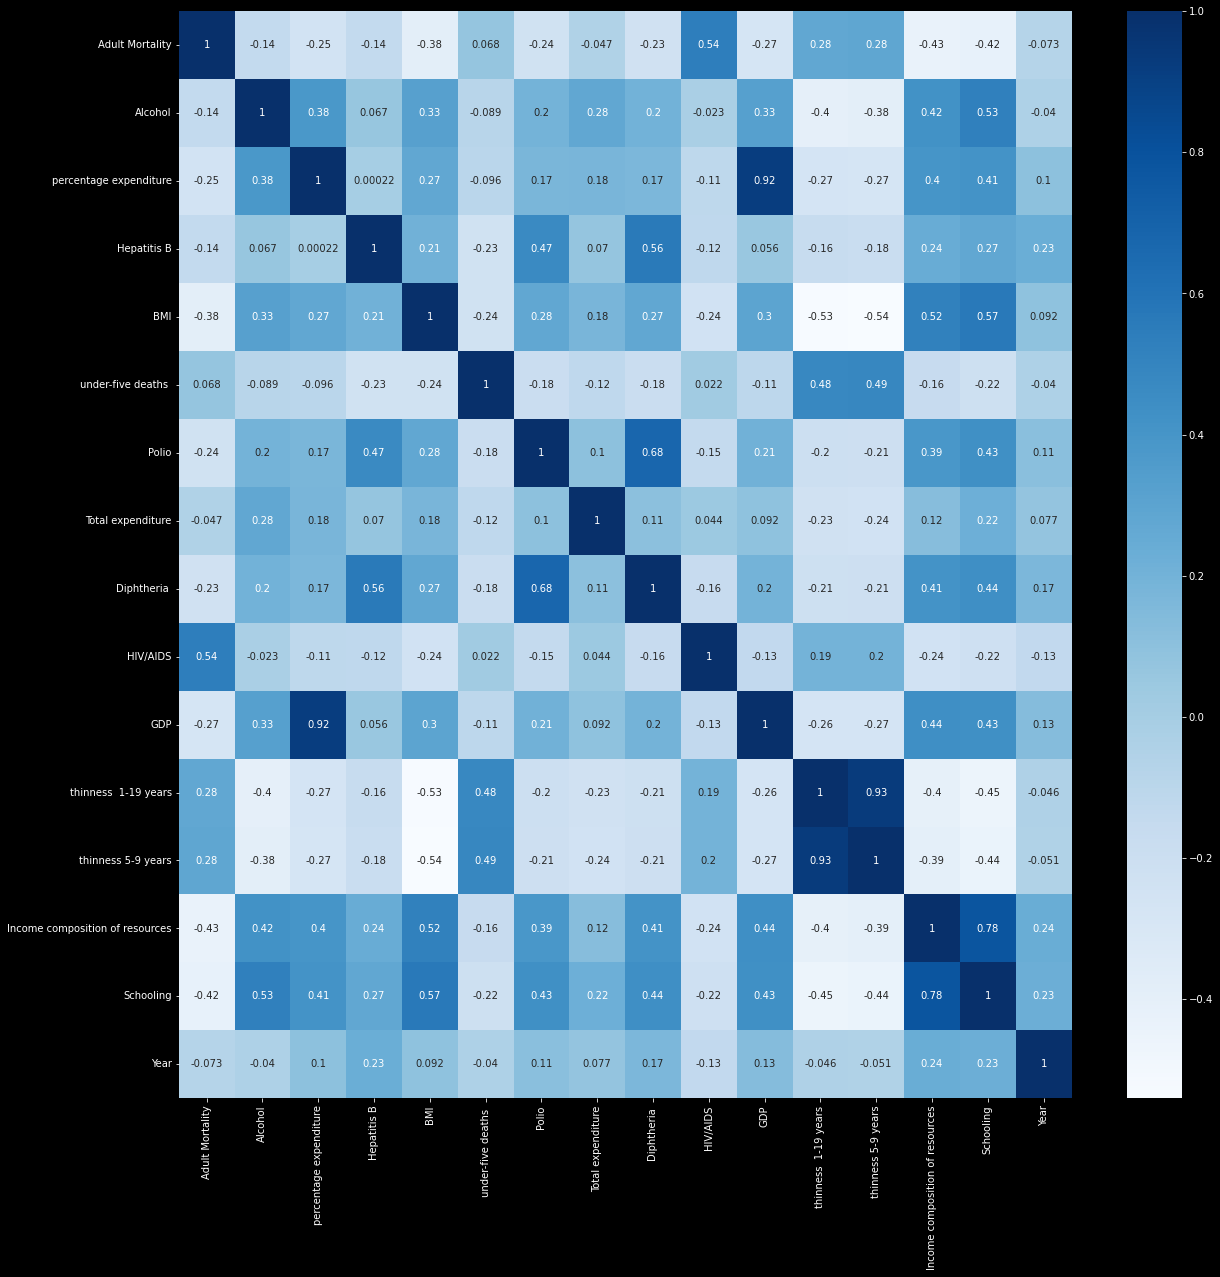

In [868]:
# Set figure size
plt.figure(figsize=(20,20))

# Calculate the correlation matrix for target relevant features that you previously determined
new_corr = ct_df[names].corr()

# Visualize the correlation matrix
sns.heatmap(new_corr, annot=True, cmap=plt.cm.Blues)
plt.show()

##### Looking at the correlation table, we can see that there are some features that have high correlations with each other:

###### thinness 1-19 years and thinness 5-9 years have a correlation of 0.93
###### Income composition of resources and Schooling have a correlation of 0.78
###### BMI and thinness 5-9 years have a correlation = -0.54
###### BMI and thinness 1-19 years have a correlation = -0.53

In [ ]:
##### Looking at the correlation table, we can see that there are some features that have high correlations with each other:

###### percentage expenditure and GDP have a correlation of 0.96
###### thinness 1-19 years and thinness 5-9 years have a correlation of 0.93
###### Income composition of resources and Schooling have a correlation of 0.78

In [869]:
# Remove the features with high correlation to other features
subset_feature_corr_names = [x for x in names if x not in ['thinness 5-9 years', 'Income composition of resources']]

# Calculate and check evaluation metrics
subset_feature_eval_df = evaluate_model_on_features(ct_df[subset_feature_corr_names], Y)
subset_feature_eval_df.index = ['Subset features']

# Append to results and display
results = results.append(subset_feature_eval_df)
results.head(n=10)

,Accuracy,ROC,Precision,Recall,F1 Score,Feature Count
All features,0.96,0.99,0.99,0.95,0.97,21
Strong features,0.93,0.99,0.96,0.95,0.96,17
Subset features,0.92,0.99,0.96,0.94,0.95,15


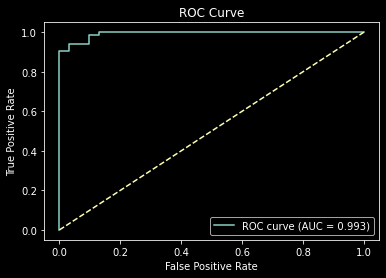

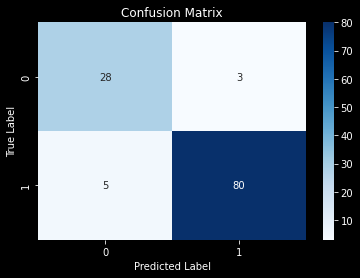

In [870]:
plot_roc_curve(ct_df[subset_feature_corr_names], Y)

In [876]:
def univariate_selection():
    
    full_data = pd.concat([X, Y], axis=1)
    # Perform time-based splitting
    train_data = full_data[(full_data['Year'] < 2011)&(full_data['Country'].isin(countries_train))]
    test_data = full_data[(full_data['Year'] >= 2011)&(full_data['Country'].isin(countries_test))]

    # Separate features and target variable
    X_train = train_data.drop([target_var], axis=1)
    y_train = train_data[target_var]
    X_test = test_data.drop([target_var], axis=1)
    y_test = test_data[target_var]

    # Feature engineering and preprocessing (if needed)
    # ...

    # Train an ExtraTreeRegressor model with group-aware cross-validation
    model = ExtraTreesClassifier(random_state=42)
    kf = GroupKFold(n_splits=5)

    mse_scores = []
    r2_scores = []

    for train_index, val_index in kf.split(X_train, y_train, groups=train_data[group_vars]):
        X_tr, X_val = X_train.iloc[train_index], X_train.iloc[val_index]
        y_tr, y_val = y_train.iloc[train_index], y_train.iloc[val_index]

        X_tr = X_tr.drop('Country', axis=1)
        X_val = X_val.drop('Country', axis=1)
        #print(X_tr['Country'])
        
        model.fit(X_tr, y_tr)
        y_pred_val = model.predict(X_val)
        
        mse_scores.append(mean_squared_error(y_val, y_pred_val))
        r2_scores.append(r2_score(y_val, y_pred_val))

    # Evaluate the model on the test set
    model.fit(X_train.drop('Country', axis=1), y_train)
    y_predict_r = model.predict(X_test.drop('Country', axis=1))
    
    # User SelectKBest to select top 8 features based on f-test
    selector = SelectKBest(f_classif, k=12)
    
    # Fit to scaled data, then transform it
    X_new = selector.fit_transform(X_train.drop('Country', axis=1), y_train)
    
    # Print the results
    feature_idx = selector.get_support()
    for name, included in zip(ct_df.drop(['Life expectancy','Country','Cluster'],1 ).columns, feature_idx):
        print("%s: %s" % (name, included))
    
    # Drop the target variable
    feature_names = ct_df.drop(['Life expectancy','Country','Cluster'],1 ).columns[feature_idx]
    
    return feature_names

In [877]:
#ct_df = ct_df.drop(['Country'],axis=1)
#nona_df = nona_df.drop(['Country'],axis=1)
univariate_feature_names = univariate_selection()
univariate_feature_names = univariate_feature_names.insert(0, ['Year','Country'])

Year: False
Status: True
Adult Mortality: True
infant deaths: False
Alcohol: False
percentage expenditure: True
Hepatitis B: False
Measles : False
BMI: True
under-five deaths : False
Polio: True
Total expenditure: False
Diphtheria : True
HIV/AIDS: True
GDP: True
Population: False
thinness  1-19 years: True
thinness 5-9 years: True
Income composition of resources: True
Schooling: True


In [878]:
# Calculate and check model metrics
univariate_eval_df = evaluate_model_on_features(ct_df[univariate_feature_names], Y)
univariate_eval_df.index = ['F-test']

# Append to results and display
results = results.append(univariate_eval_df)
results.head(n=10)

,Accuracy,ROC,Precision,Recall,F1 Score,Feature Count
All features,0.96,0.99,0.99,0.95,0.97,21
Strong features,0.93,0.99,0.96,0.95,0.96,17
Subset features,0.92,0.99,0.96,0.94,0.95,15
F-test,0.90,0.99,0.96,0.91,0.93,14


In [879]:
def run_rfe():
    
    full_data = pd.concat([X, Y], axis=1)
    # Perform time-based splitting
    train_data = full_data[(full_data['Year'] < 2011)&(full_data['Country'].isin(countries_train))]
    test_data = full_data[(full_data['Year'] >= 2011)&(full_data['Country'].isin(countries_test))]

    # Separate features and target variable
    X_train = train_data.drop([target_var], axis=1)
    y_train = train_data[target_var]
    X_test = test_data.drop([target_var], axis=1)
    y_test = test_data[target_var]

    # Feature engineering and preprocessing (if needed)
    # ...

    # Train an ExtraTreeRegressor model with group-aware cross-validation
    model = ExtraTreesClassifier(random_state=42)
    kf = GroupKFold(n_splits=5)

    mse_scores = []
    r2_scores = []

    for train_index, val_index in kf.split(X_train, y_train, groups=train_data[group_vars]):
        X_tr, X_val = X_train.iloc[train_index], X_train.iloc[val_index]
        y_tr, y_val = y_train.iloc[train_index], y_train.iloc[val_index]

        X_tr = X_tr.drop('Country', axis=1)
        X_val = X_val.drop('Country', axis=1)
        #print(X_tr['Country'])
        
        model.fit(X_tr, y_tr)
        y_pred_val = model.predict(X_val)
        
        mse_scores.append(mean_squared_error(y_val, y_pred_val))
        r2_scores.append(r2_score(y_val, y_pred_val))

    # Evaluate the model on the test set
    model.fit(X_train.drop('Country', axis=1), y_train)
    y_predict_r = model.predict(X_test.drop('Country', axis=1))
    
    # Wrap RFE around the model
    rfe = RFE(model, n_features_to_select=11)
    
    # Fit RFE
    rfe = rfe.fit(X_train.drop('Country', axis=1), y_train)
    feature_names = ct_df.drop(['Life expectancy','Country','Cluster'],1 ).columns[rfe.get_support()]
    
    return feature_names

rfe_feature_names = run_rfe()
rfe_feature_names = rfe_feature_names.insert(0, ['Year','Country'])

In [880]:
# Calculate and check model metrics
rfe_eval_df = evaluate_model_on_features(ct_df[rfe_feature_names], Y)
rfe_eval_df.index = ['RFE']

# Append to results and display
results = results.append(rfe_eval_df)
results.head(n=10)

,Accuracy,ROC,Precision,Recall,F1 Score,Feature Count
All features,0.96,0.99,0.99,0.95,0.97,21
Strong features,0.93,0.99,0.96,0.95,0.96,17
Subset features,0.92,0.99,0.96,0.94,0.95,15
F-test,0.90,0.99,0.96,0.91,0.93,14
RFE,0.97,1.00,1.00,0.94,0.97,13


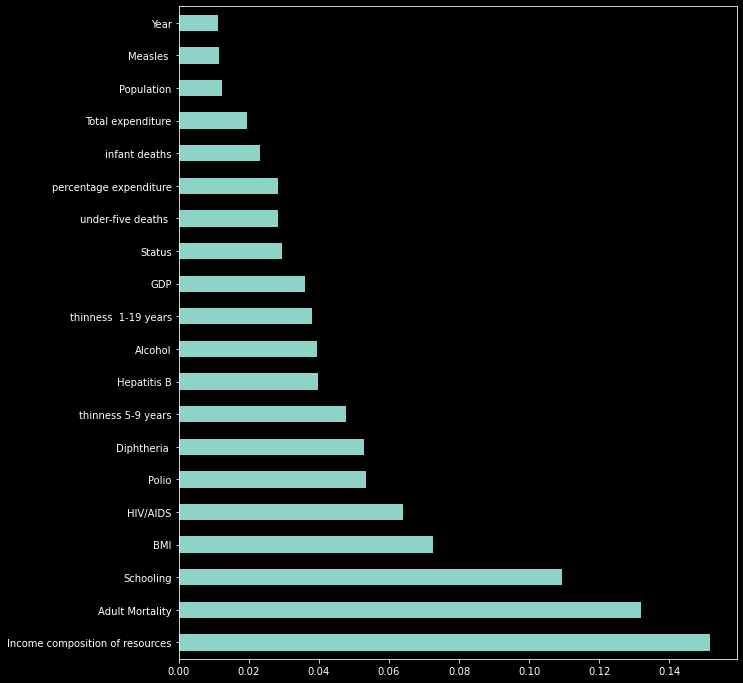

In [881]:
def feature_importances_from_tree_based_model_():
    
    full_data = pd.concat([X, Y], axis=1)
    # Perform time-based splitting
    train_data = full_data[(full_data['Year'] < 2011)&(full_data['Country'].isin(countries_train))]
    test_data = full_data[(full_data['Year'] >= 2011)&(full_data['Country'].isin(countries_test))]

    # Separate features and target variable
    X_train = train_data.drop([target_var], axis=1)
    y_train = train_data[target_var]
    X_test = test_data.drop([target_var], axis=1)
    y_test = test_data[target_var]

    # Feature engineering and preprocessing (if needed)
    # ...

    # Train an ExtraTreeRegressor model with group-aware cross-validation
    model = ExtraTreesClassifier(random_state=42)
    kf = GroupKFold(n_splits=5)

    for train_index, val_index in kf.split(X_train, y_train, groups=train_data[group_vars]):
        X_tr, X_val = X_train.iloc[train_index], X_train.iloc[val_index]
        y_tr, y_val = y_train.iloc[train_index], y_train.iloc[val_index]

        X_tr = X_tr.drop('Country', axis=1)
        X_val = X_val.drop('Country', axis=1)
        #print(X_tr['Country'])
        
        model.fit(X_tr, y_tr)
        y_pred_val = model.predict(X_val)


    # Evaluate the model on the test set
    model.fit(X_train.drop('Country', axis=1), y_train)
    y_predict_r = model.predict(X_test.drop('Country', axis=1))
    
    # Plot feature importance
    plt.figure(figsize=(10, 12))
    feat_importances = pd.Series(model.feature_importances_, index=X.drop('Country', axis=1).columns)
    feat_importances.sort_values(ascending=False).plot(kind='barh')
    plt.show()
    
    return model


def select_features_from_model(model):
    
    model = SelectFromModel(model, prefit=True, threshold=0.025)
    feature_idx = model.get_support()
    feature_names = ct_df.drop(['Life expectancy','Country','Cluster'],1 ).columns[feature_idx]
        
    return feature_names

model = feature_importances_from_tree_based_model_()
feature_imp_feature_names = select_features_from_model(model)
feature_imp_feature_names = feature_imp_feature_names.insert(0, ['Year','Country'])

In [902]:
#results = results.drop(results.index[-1])

In [903]:
# Calculate and check model metrics
feat_imp_eval_df = evaluate_model_on_features(ct_df[feature_imp_feature_names], Y)
feat_imp_eval_df.index = ['Feature Importance']

# Append to results and display
results = results.append(feat_imp_eval_df)
results.head(n=10)

,Accuracy,ROC,Precision,Recall,F1 Score,Feature Count
All features,0.96,0.99,0.99,0.95,0.97,21
Strong features,0.93,0.99,0.96,0.95,0.96,17
Subset features,0.92,0.99,0.96,0.94,0.95,15
F-test,0.90,0.99,0.96,0.91,0.93,14
RFE,0.97,1.00,1.00,0.94,0.97,13
Feature Importance,0.95,0.99,0.99,0.94,0.96,17


In [909]:
def run_l1_regularization():
    
    full_data = pd.concat([X, Y], axis=1)
    # Perform time-based splitting
    train_data = full_data[(full_data['Year'] < 2011)&(full_data['Country'].isin(countries_train))]
    test_data = full_data[(full_data['Year'] >= 2011)&(full_data['Country'].isin(countries_test))]

    # Separate features and target variable
    X_train = train_data.drop([target_var], axis=1)
    y_train = train_data[target_var]
    X_test = test_data.drop([target_var], axis=1)
    y_test = test_data[target_var]

    # Feature engineering and preprocessing (if needed)
    # ...

    # Train an ExtraTreeRegressor model with group-aware cross-validation
    model = ExtraTreesClassifier(random_state=42)
    kf = GroupKFold(n_splits=5)

    mse_scores = []
    r2_scores = []

    for train_index, val_index in kf.split(X_train, y_train, groups=train_data[group_vars]):
        X_tr, X_val = X_train.iloc[train_index], X_train.iloc[val_index]
        y_tr, y_val = y_train.iloc[train_index], y_train.iloc[val_index]

        X_tr = X_tr.drop('Country', axis=1)
        X_val = X_val.drop('Country', axis=1)
        #print(X_tr['Country'])
        
        model.fit(X_tr, y_tr)
        y_pred_val = model.predict(X_val)
        
        mse_scores.append(mean_squared_error(y_val, y_pred_val))
        r2_scores.append(r2_score(y_val, y_pred_val))

    # Evaluate the model on the test set
    model.fit(X_train.drop('Country', axis=1), y_train)
    y_predict_r = model.predict(X_test.drop('Country', axis=1))
    
    # Select L1 regulated features from LinearSVC output 
    selection = SelectFromModel(LogisticRegression(penalty='l1', solver='liblinear'))
    #selection = SelectFromModel(LinearSVC(C=1, penalty='l1', dual=False))
    selection.fit(X_train.drop('Country', axis=1), y_train)

    feature_names = ct_df.drop(['Life expectancy','Country','Cluster'],1 ).columns[(selection.get_support())]
    
    return feature_names

l1reg_feature_names = run_l1_regularization()
l1reg_feature_names = l1reg_feature_names.insert(0, ['Country'])

In [910]:
l1reg_feature_names

Index(['Country', 'Year', 'Status', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', 'BMI',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       'HIV/AIDS', 'GDP', 'thinness  1-19 years', 'thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [911]:
# Calculate and check model metrics
l1reg_eval_df = evaluate_model_on_features(ct_df[l1reg_feature_names], Y)
l1reg_eval_df.index = ['L1 Reg']

# Append to results and display
results = results.append(l1reg_eval_df)
results.head(n=10)

,Accuracy,ROC,Precision,Recall,F1 Score,Feature Count
All features,0.96,0.99,0.99,0.95,0.97,21
Strong features,0.93,0.99,0.96,0.95,0.96,17
Subset features,0.92,0.99,0.96,0.94,0.95,15
F-test,0.90,0.99,0.96,0.91,0.93,14
RFE,0.97,1.00,1.00,0.94,0.97,13
Feature Importance,0.95,0.99,0.99,0.94,0.96,17
L1 Reg,0.95,0.99,0.99,0.94,0.96,20
